<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/sm_aut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [254]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [255]:
import warnings

warnings.filterwarnings('ignore')

input

In [256]:
df = pd.read_csv("sm_algo.csv")

exploratory

In [313]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Knowledge        98 non-null     int64  
 1   Problem Solving  98 non-null     int64  
 2   Interaction      98 non-null     int64  
 3   Impact           95 non-null     float64
 4   Accountability   98 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


In [258]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,181,65,106,169.0,25
1,181,65,106,169.0,25
2,181,65,106,169.0,25
3,181,65,106,169.0,25
4,181,65,106,169.0,25


checks

In [259]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,98.000000,98.000000,98.000000,95.000000,98.000000
mean,233.469388,79.561224,76.255102,192.705263,38.836735
std,41.127211,32.469198,24.115834,33.544468,14.085669
min,181.000000,48.000000,36.000000,128.000000,0.000000
25%,219.000000,65.000000,66.000000,169.000000,28.000000
50%,221.000000,65.000000,66.000000,197.000000,40.000000
75%,258.000000,87.000000,106.000000,213.000000,45.000000
max,300.000000,150.000000,129.000000,260.000000,75.000000


In [260]:
X=df

Scaling

In [261]:
cols = X.columns

In [262]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [263]:
X = pd.DataFrame(X, columns=[cols])

In [264]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.0,0.166667,0.752688,0.310606,0.333333
1,0.0,0.166667,0.752688,0.310606,0.333333
2,0.0,0.166667,0.752688,0.310606,0.333333
3,0.0,0.166667,0.752688,0.310606,0.333333
4,0.0,0.166667,0.752688,0.310606,0.333333


In [265]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.000000,0.166667,0.752688,0.310606,0.333333
1,0.000000,0.166667,0.752688,0.310606,0.333333
2,0.000000,0.166667,0.752688,0.310606,0.333333
3,0.000000,0.166667,0.752688,0.310606,0.333333
4,0.000000,0.166667,0.752688,0.310606,0.333333
...,...,...,...,...,...
93,0.319328,0.166667,0.139785,0.204545,0.706667
94,1.000000,1.000000,0.516129,0.863636,0.560000
95,0.647059,0.166667,0.322581,1.000000,0.800000
96,1.000000,1.000000,0.516129,0.863636,0.733333


K means

In [266]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [267]:
kmeans.cluster_centers_

array([[0.93697479, 0.35714286, 0.37941628, 0.58062771, 0.53333333],
       [0.23905682, 0.29587357, 0.46685925, 0.45239711, 0.51840796]])

inertia

In [268]:
kmeans.inertia_

26.859055123499473

Elbow

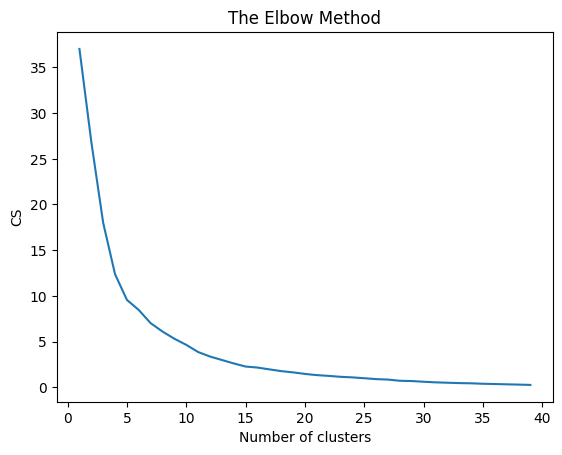

In [269]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

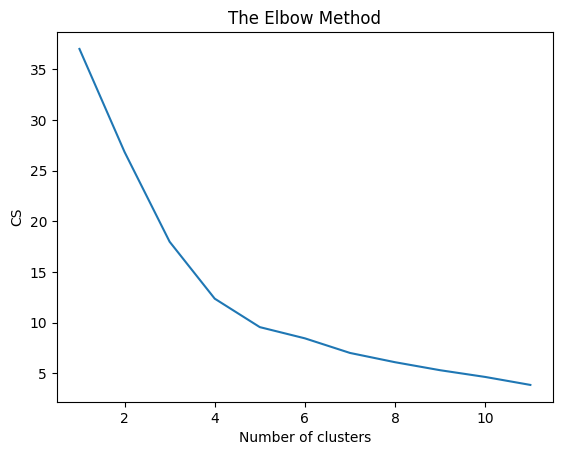

In [270]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [302]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=102) 

kmeans.fit(X)

KMeans(n_clusters=5, random_state=102)

In [303]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('sm_aut_l.csv')
print(labels)

[0 0 0 0 0 3 1 1 1 1 1 3 3 0 1 1 3 1 3 3 1 0 1 0 1 2 2 1 1 0 0 4 3 1 1 1 4
 4 4 4 4 0 1 1 0 0 0 0 3 0 0 0 0 1 0 0 0 3 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1
 1 1 1 0 1 3 1 1 0 0 0 3 4 0 4 1 1 2 4 2 4]


In [304]:
Z=kmeans.cluster_centers_
Z

array([[0.11204482, 0.19862019, 0.7646356 , 0.50252525, 0.44691358],
       [0.3242071 , 0.17615433, 0.18973292, 0.38660802, 0.56989247],
       [0.55514706, 1.        , 0.52553763, 0.66145833, 0.5725    ],
       [1.        , 0.13636364, 0.34017595, 0.15082645, 0.48484848],
       [0.92941176, 0.15      , 0.32258065, 0.87727273, 0.544     ]])

[t-SNE] Computing 94 nearest neighbors...
[t-SNE] Indexed 95 samples in 0.000s...
[t-SNE] Computed neighbors for 95 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 95 / 95
[t-SNE] Mean sigma: 0.828771
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.907166
[t-SNE] KL divergence after 5000 iterations: 0.043366


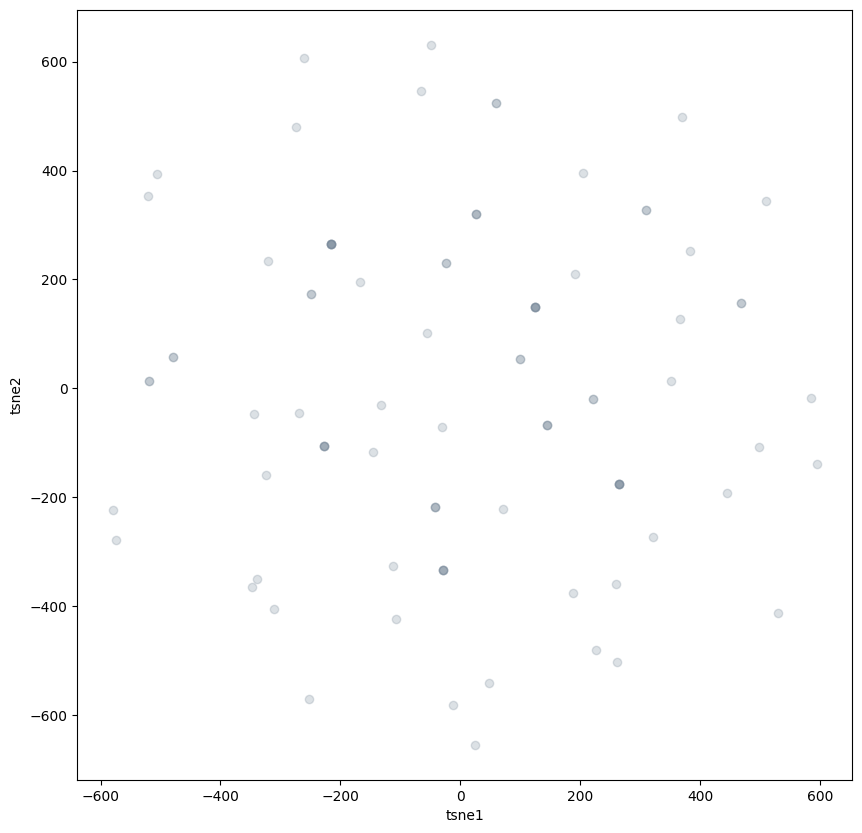

In [305]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [306]:
import matplotlib

In [307]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 94 nearest neighbors...
[t-SNE] Indexed 95 samples in 0.001s...
[t-SNE] Computed neighbors for 95 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 95 / 95
[t-SNE] Mean sigma: 0.828771
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.843460
[t-SNE] KL divergence after 2500 iterations: -0.049642


In [308]:
np.unique(labels)


array([0, 1, 2, 3, 4], dtype=int32)

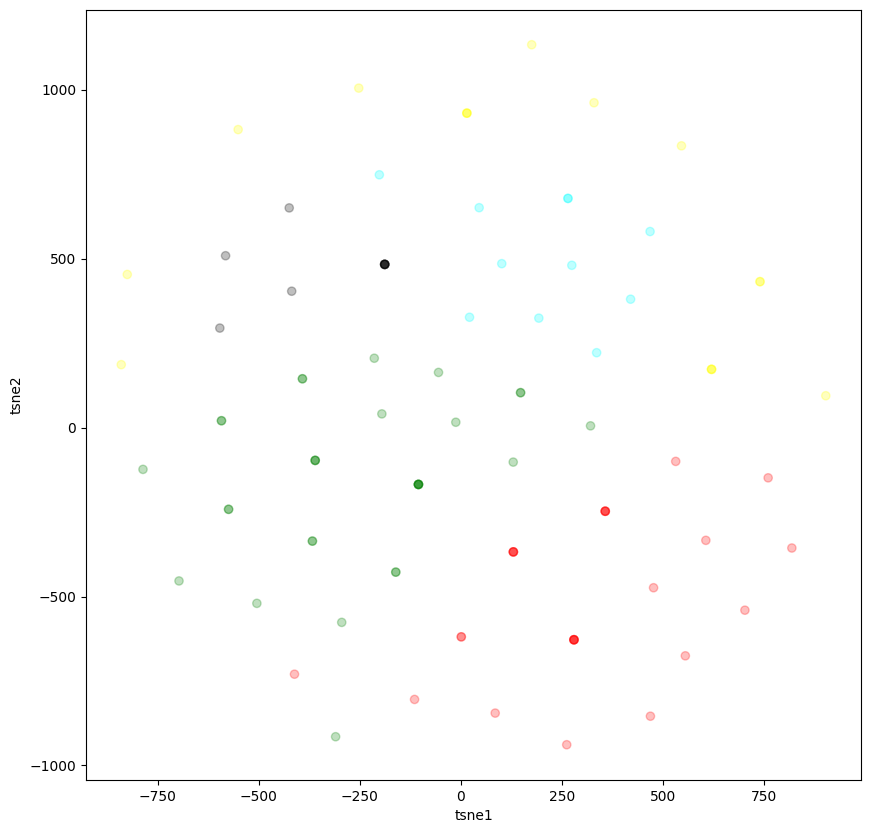

In [309]:
colors = ["red","green","purple","yellow","cyan","black"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [310]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_sm_aut.csv')
Z2

array([[136.82847325,  42.01026426,  46.51234657, 127.08174928,
         13.26282261],
       [139.48653317,  41.7556247 ,  44.03136318, 125.74691439,
         13.39330237],
       [142.37984781,  51.09351503,  45.48052309, 128.91192939,
         13.39606894],
       [147.9531559 ,  41.30461649,  44.6805977 , 123.03179217,
         13.30307129],
       [147.06879627,  41.45917804,  44.60466543, 131.39712133,
         13.36583064]])

In [311]:
P = pd.read_csv("tr.csv")
P.dropna(inplace=True)
P = ms.fit_transform(P)
P2=kmeans.predict(P)
P2

array([4, 1, 2, 1], dtype=int32)